# La bibliothèque numpy.random
La sous-bibliothèque `numpy.random` sera très utile en physique et en chimie pour les calculs d'incertitude (simulation de Monte-Carlo). Elle propose des fonctions qui permettent de simuler un tirage aléatoire suivant une loi choisi. On présente deux fonctions en particulier : `uniform` et `normal`.

## Rappel : Importation de la bibliothèque

In [1]:
import numpy.random as rd  # Il est conseillé d'importer les bibliothèques au début de votre script

"""On importe aussi les autres bibliothèques scientifiques qui vont être utiles"""
import matplotlib.pyplot as plt
import numpy as np


## Signature des fonctions usuelles
On ne présente pas ici les loi de probabilités. Voici quelques informations :
* [Loi uniforme - Wikipedia](https://fr.wikipedia.org/wiki/Loi_uniforme_continue)
* [Loi normale (ou gaussienne) - Wikipedia](https://fr.wikipedia.org/wiki/Loi_normale)

La syntaxe :
* `rd.uniform(a, b, N)` va réaliser N tirages aléatoires suivant une loi uniforme entre les valeurs `a` et `b`.
* `rd.normal(m, s, N)` va réaliser N tirages aléatoires suivant une loi normale d'espérance `m` et d'écart-type `s`

```{note} 
Les deux fonctions renvoient un vecteur `numpy`
```

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 14.8 µs


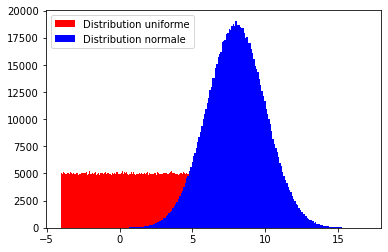

In [2]:
%time  # Permet d'afficher le temps d'exécution (pas à connaître). 
# On verra qu'on peut ainsi faire un grande nombre de simulation rapidement

N = 1000000  # Nombre d'échantillons
X1 = rd.uniform(-4, 6, N)  # Distribution uniforme entre -4 et 6
X2 = rd.normal(8, 2, N)  # Distribution normale de moyenne 8 et d'écart-type 2

f, ax = plt.subplots()
ax.hist(X1, bins='rice', color='red', label='Distribution uniforme')
ax.hist(X2, bins='rice', color='blue', label='Distribution normale')
ax.legend()
plt.show()


## Intérêt de la vectorialisation
Les fonctions `uniform` et `normal` renvoient des _vecteurs numpy_. On __peut donc réaliser des opérations termes à termes entre deux vecteurs issus de ces fonctions.__

````{admonition} Exemple
:class: note
On dispose de deux variables aléatoires $X_1$ et $X_2$ qui suivent deux lois :
* $X_1$ suit une loi uniforme entre 2 et 4
* $X_2$ suit une loi normale d'espérance 1 et d'écart-type 1.

On désire connaître la loi que suit la variable définie par $Y = X_2 / X_1$. Pour le savoir, on va réaliser N tirages de $X_1$ et $X_2$ et évaluer leur rapport à chaque fois. On obtient ainsi N échantillons simulés de $Y$ dont on va tracer l'histogramme.
````

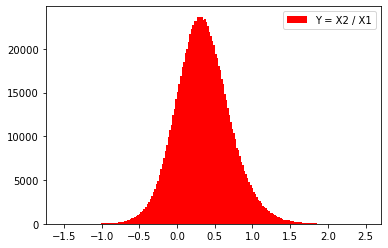

In [3]:
N = 1000000
X1 = rd.uniform(2, 4, N)  # N simulations de X1
X2 = rd.normal(1, 1, N)  # N simulations de X2
Y = X2 / X1  # On utilise la vectorialisation des opérations pour estimer Y

f, ax = plt.subplots()
ax.hist(Y, bins='rice', color='red', label='Y = X2 / X1')
ax.legend()
plt.show()

```{note}
Ce principe consistant à simuler ungrand nombre de tirages des $X_i$ pour obtenir la distribution de $Y$ puis sa valeur moyenne et son écart-type s'appelle __simulation de Monte-Carlo__. Elle sera utilisée en physique et en chimie pour estimer des incertitudes de mesure.
```

## Caractéristique d'une distribution
`numpy` permet aussi de remonter à des grandeurs utiles sur une distribution statistique : sa moyenne et son écart-type. Ces fonctions seront aussi utiles avec des données expérimentales.

* `mean(vec)` renvoie la moyenne des éléments du vecteur numpy `vec`
* `std(vec, ddof=1)` renvoie l'écart-type des éléments du vecteur numpy `vec`

```{margin}
On ne rentre pas les détails, mais l'option `ddof=1` est importante sinon le calcul de  `std` ne sera pas correct.
```

## Pour vous entraîner
Voici le [lien vers les exercices pour vous entraîner sur l'importation et l'utilisation de la bibliothèque random](https://pcsi3physiquestan.github.io/intro_python_td/notebook/exo_science_2.html)